<a href="https://colab.research.google.com/github/qmcnn/AIPrototype2023/blob/main/Tensorflow_(Deep_Learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้)

~~3. Subclassing~~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

# Sequential

### Import

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Define

In [31]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(5, activation="softmax", name="output")
    ]
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ~Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)~

### Predict

In [33]:
# Call model on a test input
x = tf.ones((5, 4))#กลุ่มของเวกเตอร์

In [34]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [35]:
y = model(x)

In [36]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.36312598, 0.3599193 , 0.09969401, 0.08241811, 0.09484261],
       [0.36312598, 0.3599193 , 0.09969401, 0.08241811, 0.09484261],
       [0.36312598, 0.3599193 , 0.09969401, 0.08241811, 0.09484261],
       [0.36312598, 0.3599193 , 0.09969401, 0.08241811, 0.09484261],
       [0.36312598, 0.3599193 , 0.09969401, 0.08241811, 0.09484261]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [37]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ปรับเปลี่ยน Network

In [39]:
model2.pop()


In [40]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model2.add(layers.Dense(6)) #add เพิ่มnode

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.0674234 ,  0.39428562, -0.35283703,  0.2185326 , -0.21112522,
        -0.15929139],
       [-0.0674234 ,  0.39428562, -0.35283703,  0.2185326 , -0.21112522,
        -0.15929139],
       [-0.0674234 ,  0.39428562, -0.35283703,  0.2185326 , -0.21112522,
        -0.15929139],
       [-0.0674234 ,  0.39428562, -0.35283703,  0.2185326 , -0.21112522,
        -0.15929139],
       [-0.0674234 ,  0.39428562, -0.35283703,  0.2185326 , -0.21112522,
        -0.15929139]], dtype=float32)>

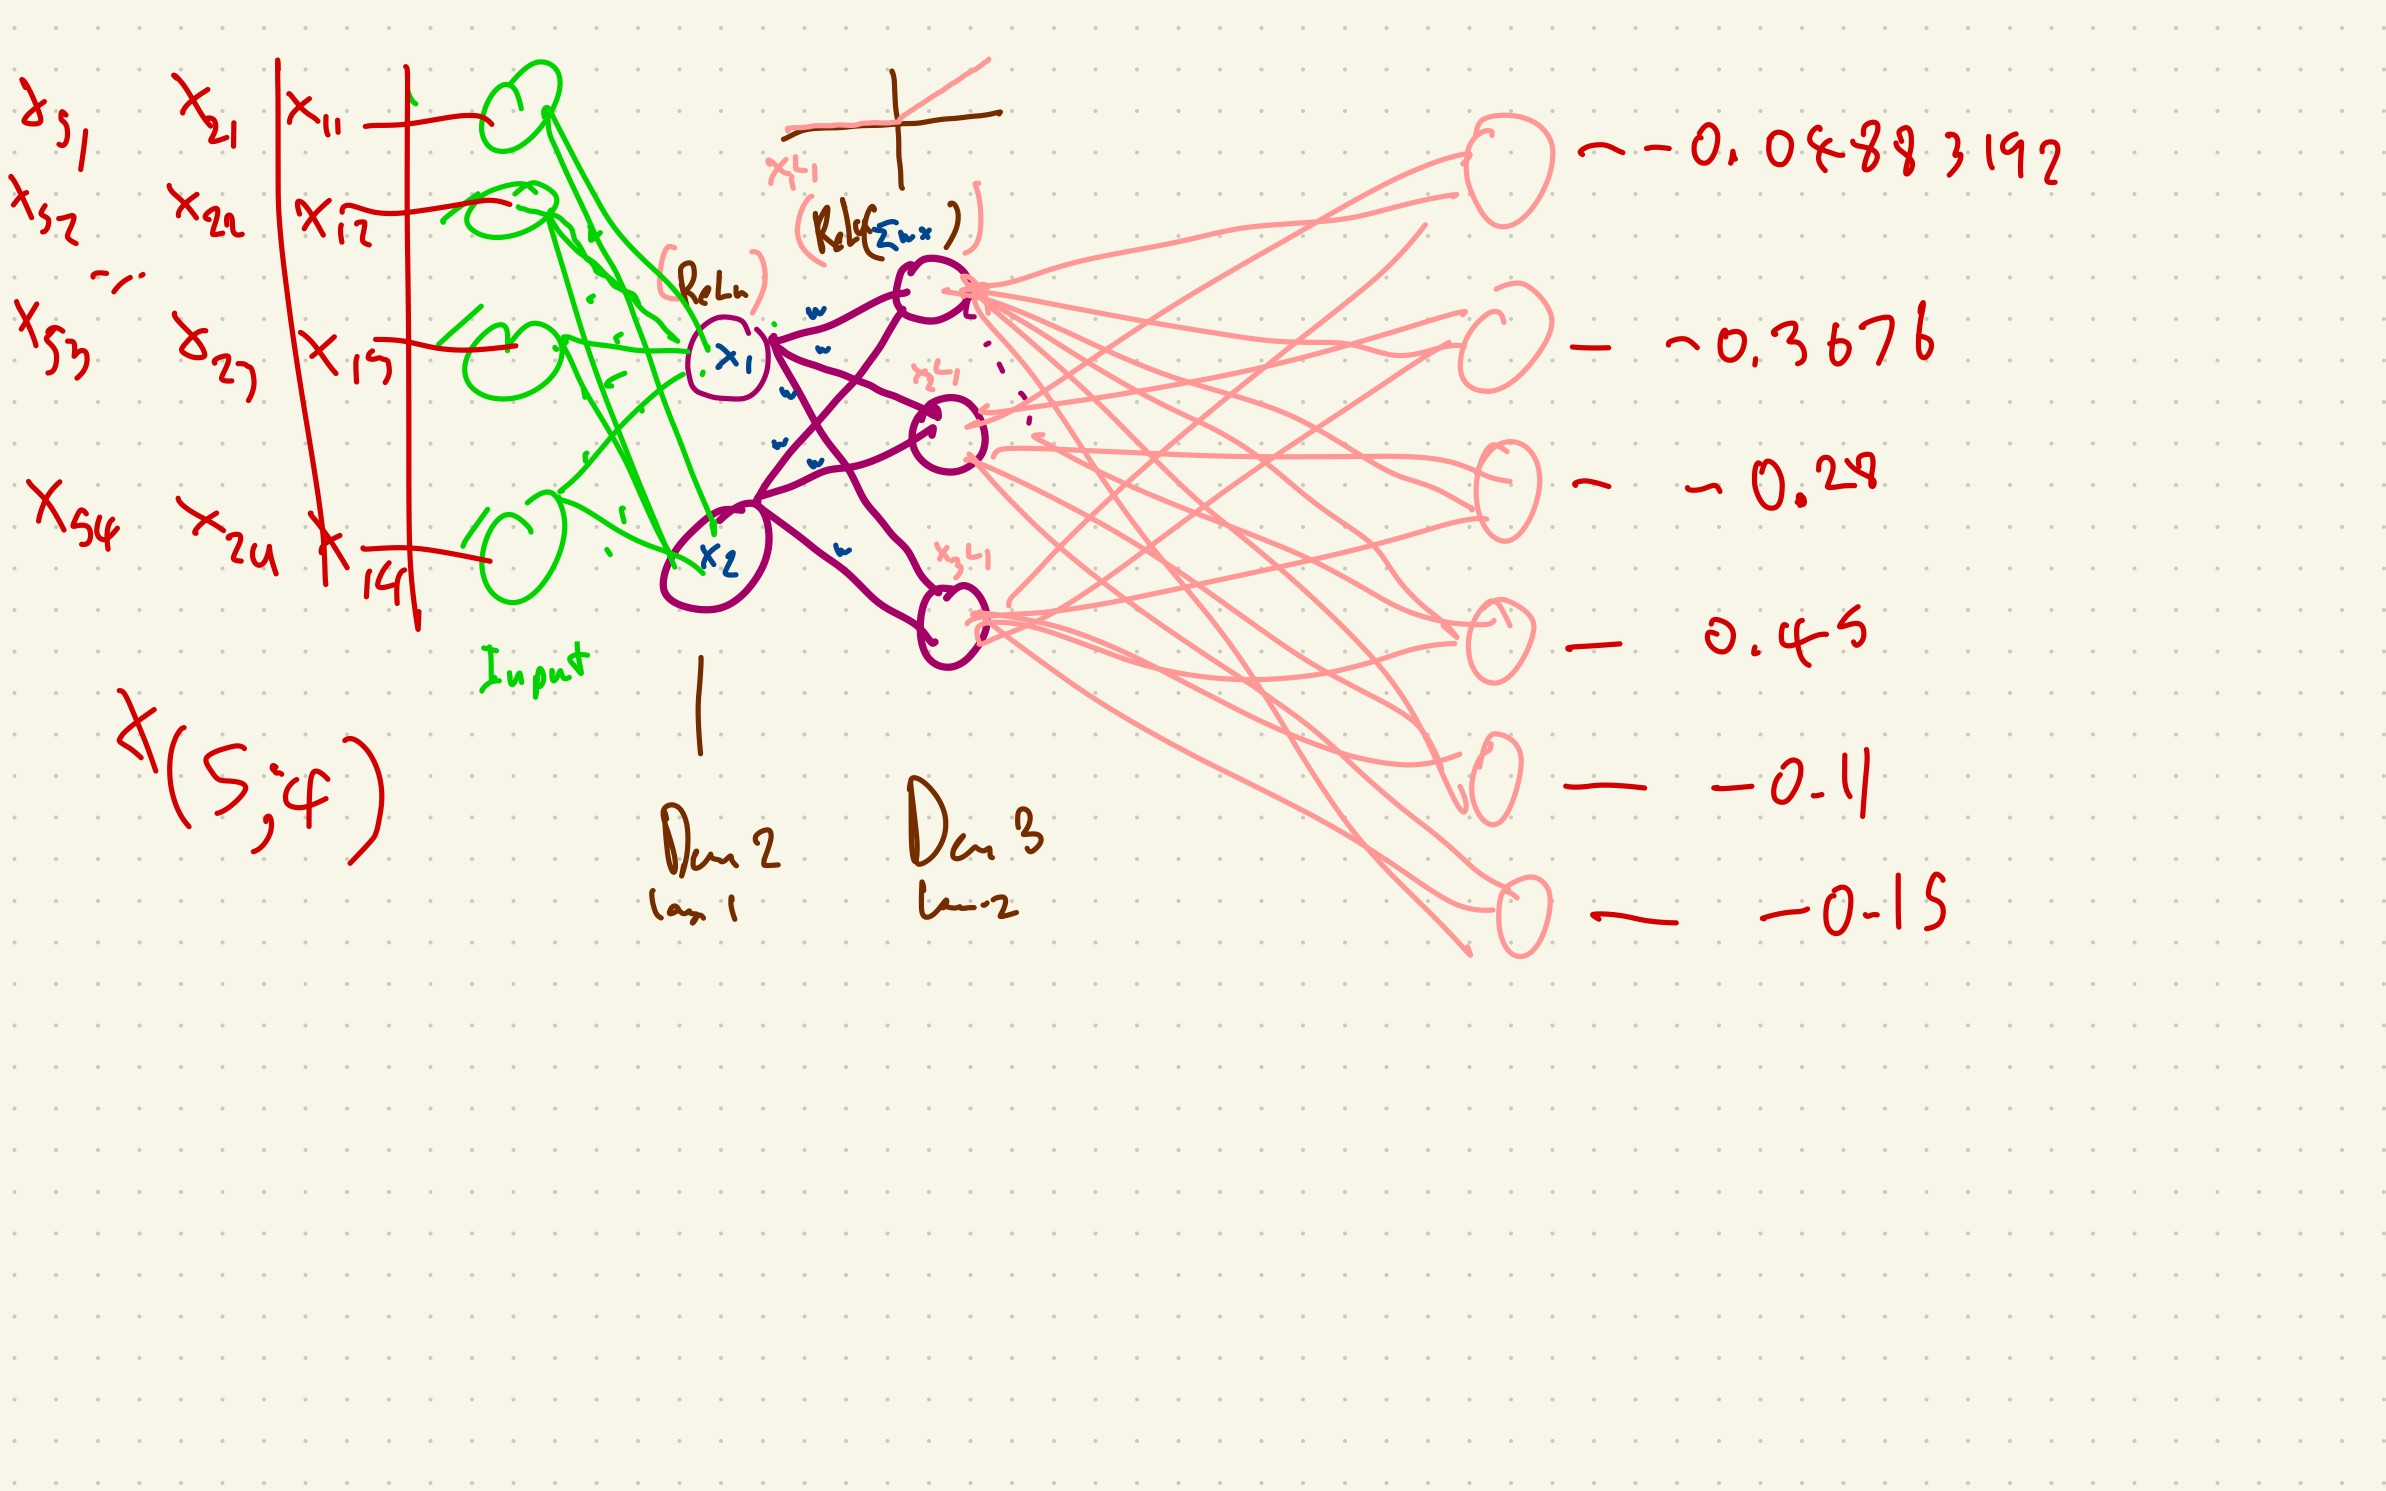

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [44]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [45]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network  #ค่าที่จะเข้าnetworkได้ต้อง0-1

In [46]:
# Normalize pixel values to be between 0 and 1 #ค่าสูงสุดคือ255 เลยนำไปหาร
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

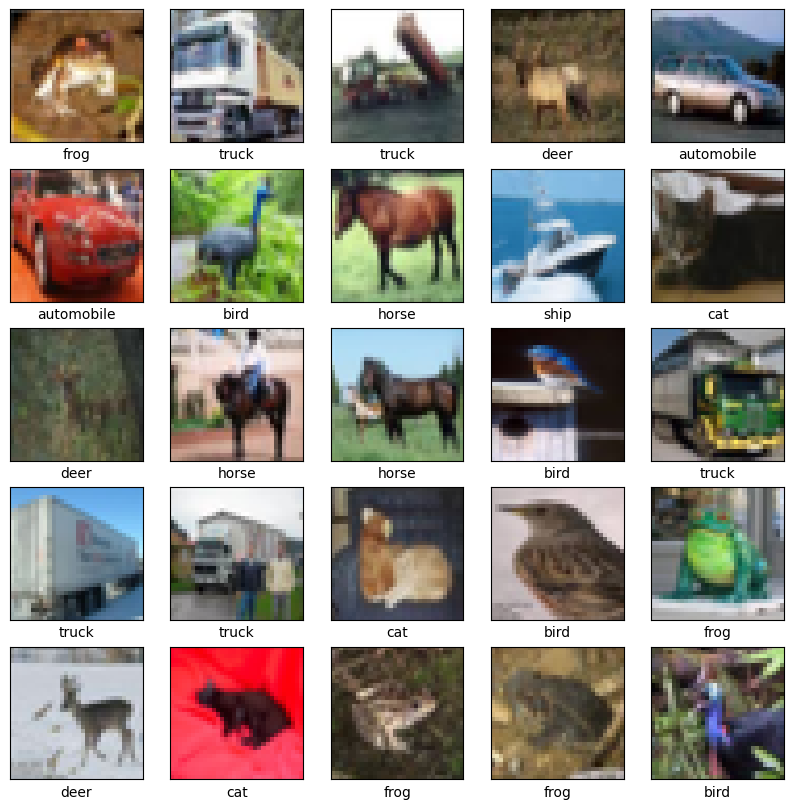

In [47]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

ภาพ 32*32

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

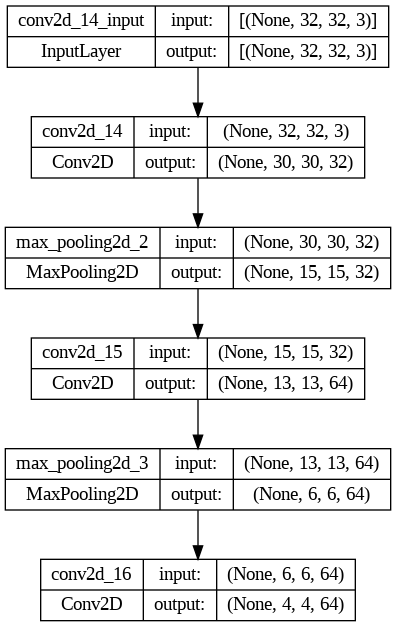

In [50]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

Flatten = จับพารามิเตอทุกอันมายืดเป็นเส้นตรง

In [51]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

input 32*32 (ภาพ)
3

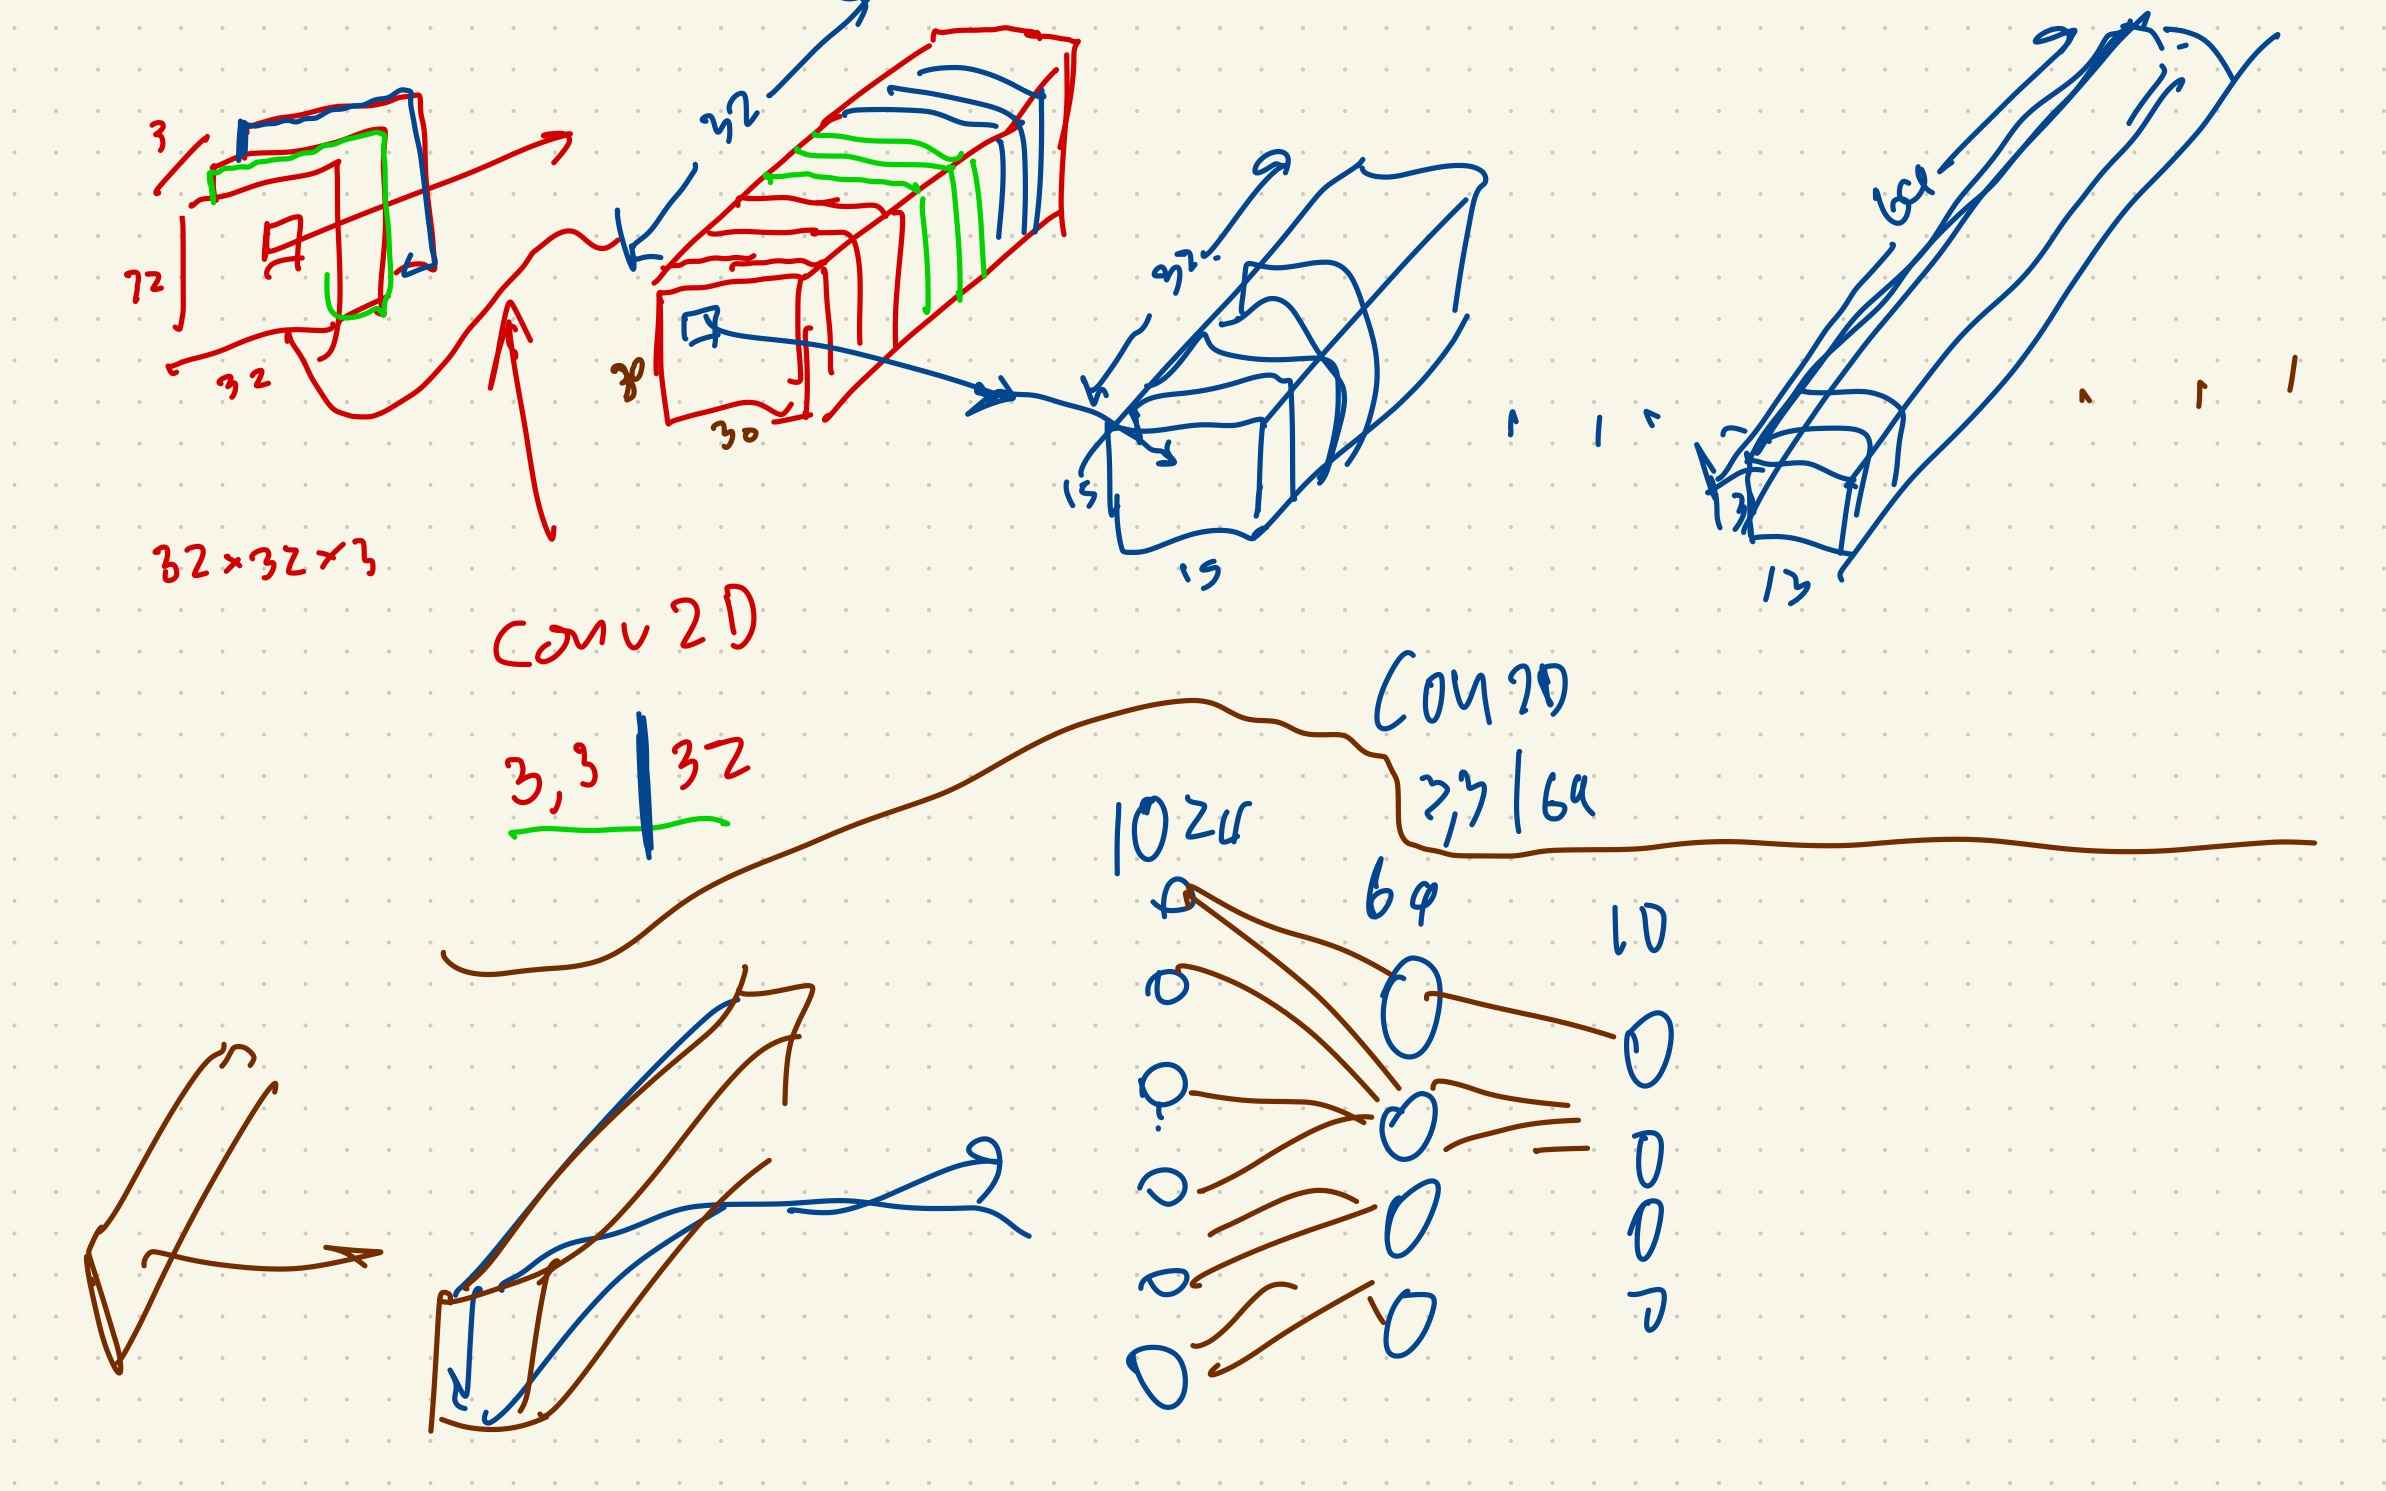

### Define training parameters

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [54]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5103 - accuracy: 0.4498 - val_loss: 1.2167 - val_accuracy: 0.5642
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1342 - accuracy: 0.6003 - val_loss: 1.0983 - val_accuracy: 0.6118


### Test

In [55]:
history.history

{'loss': [1.5103182792663574, 1.1342474222183228],
 'accuracy': [0.44975998997688293, 0.6002600193023682],
 'val_loss': [1.2167357206344604, 1.0982921123504639],
 'val_accuracy': [0.5641999840736389, 0.6118000149726868]}

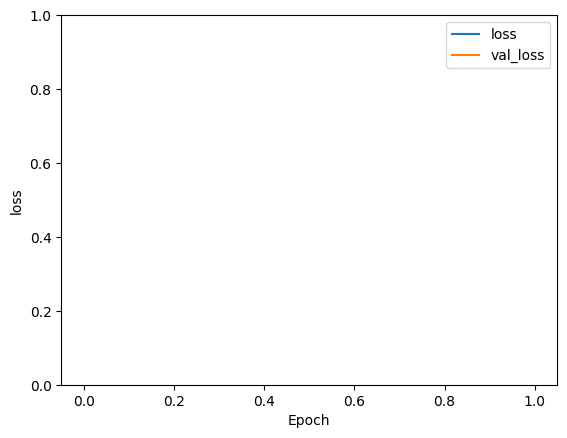

In [57]:
plt.plot([0,1],history.history['loss'], label='loss')
plt.plot([0,1],history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

In [58]:
test_loss = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0983 - accuracy: 0.6118 - 646ms/epoch - 2ms/step


In [59]:
print(test_acc)

NameError: name 'test_acc' is not defined

## Functional

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [62]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [63]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

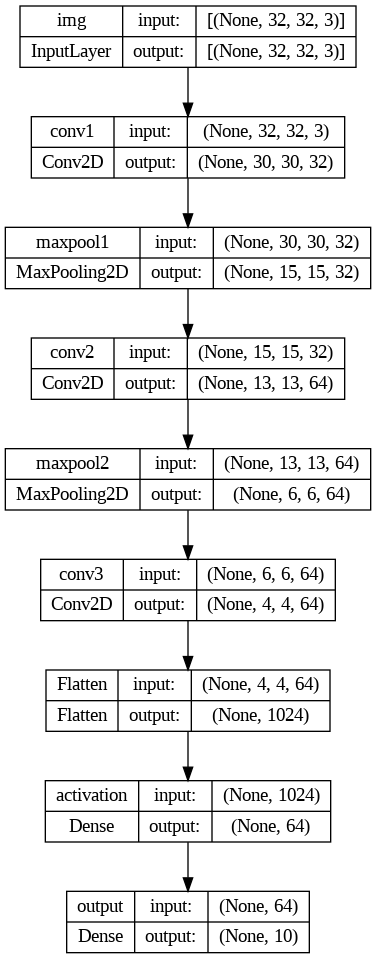

In [64]:
keras.utils.plot_model(my_model, show_shapes=True)

In [65]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4937 - accuracy: 0.4577 - val_loss: 1.2062 - val_accuracy: 0.5679
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1318 - accuracy: 0.5978 - val_loss: 1.0240 - val_accuracy: 0.6401
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9838 - accuracy: 0.6555 - val_loss: 0.9881 - val_accuracy: 0.6506
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8838 - accuracy: 0.6910 - val_loss: 0.9129 - val_accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8055 - accuracy: 0.7178 - val_loss: 0.9039 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7481 - accuracy: 0.7377 - val_loss: 0.9289 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6954 - accuracy: 0.7558 - val_loss: 0.8614 - val_accuracy

313/313 - 1s - loss: 0.8614 - accuracy: 0.7168 - 667ms/epoch - 2ms/step


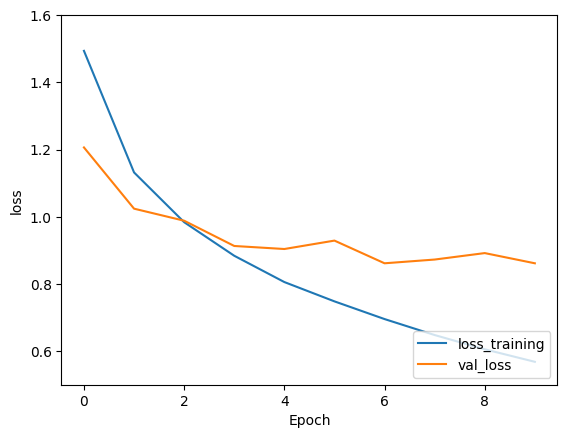

In [67]:
plt.plot(range(10),history.history['loss'], label='loss_training')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [69]:
print(test_acc)

0.7167999744415283


### ResNet

In [70]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x) #รับoutputของblockแรก

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])#รับoutputของblockแรก

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output]) #รับoutputของblockแรก

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x) #sum data เป็นเส้นยาวๆ
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_18 (Conv2D)          (None, 28, 28, 64)           18496     ['conv2d_17[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_18[0][0]']           
 g2D)                                                                                    

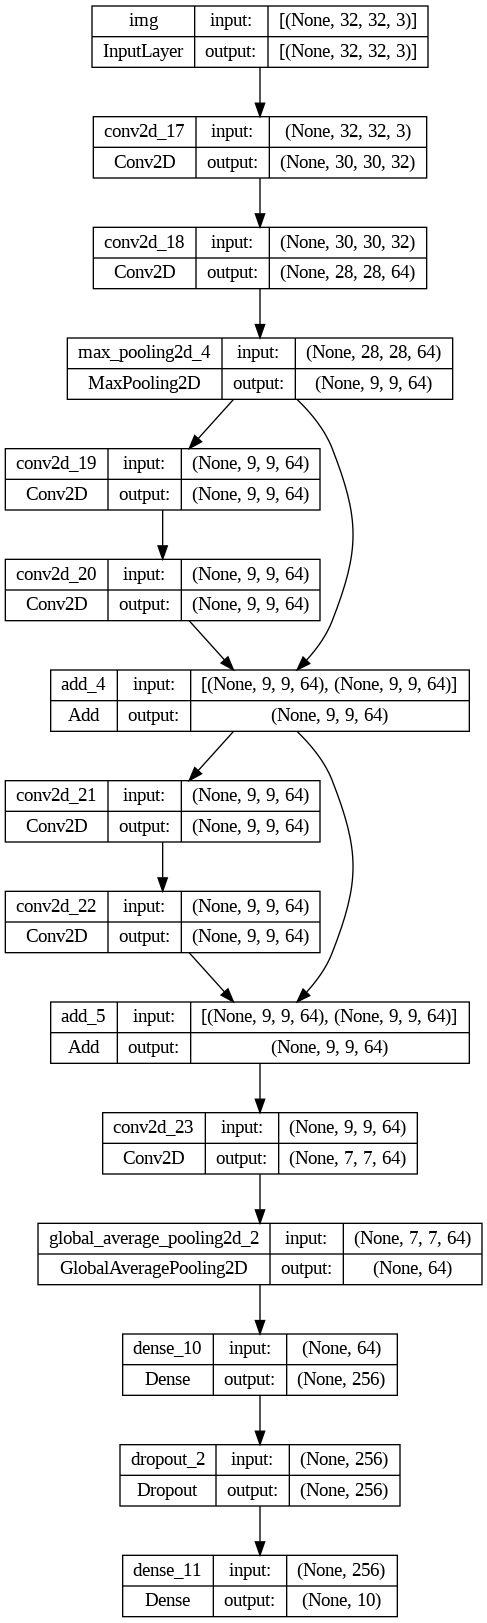

In [71]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [72]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 9ms/step - loss: 1.6777 - accuracy: 0.3548 - val_loss: 1.2715 - val_accuracy: 0.5242
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1899 - accuracy: 0.5666 - val_loss: 1.0180 - val_accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9825 - accuracy: 0.6478 - val_loss: 0.9222 - val_accuracy: 0.6744
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8590 - accuracy: 0.6940 - val_loss: 0.8380 - val_accuracy: 0.7063
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7697 - accuracy: 0.7292 - val_loss: 0.8478 - val_accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6997 - accuracy: 0.7562 - val_loss: 0.7318 - val_accuracy: 0.7417
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6367 - accuracy: 0.7808 - val_loss: 0.7635 - val_ac

313/313 - 1s - loss: 0.8614 - accuracy: 0.7168 - 669ms/epoch - 2ms/step


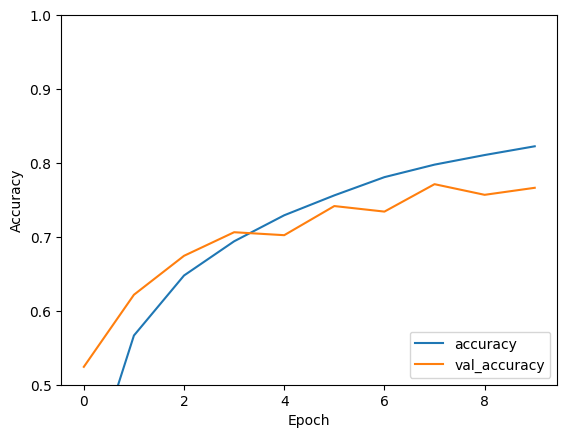

In [74]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [75]:
print(test_acc)

0.7167999744415283


# Tensorflow Data Pipeline

flow from directory

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
path2data = '/content/drive/MyDrive/Year4/AI/Classification Dataset'

In [78]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_25 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_24[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_25[0][0]']           
 g2D)                                                                               

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [80]:
from tensorflow.keras import optimizers

lr = learning rate

In [81]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ผ่าน 7 epoch

In [82]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=30,
      verbose=1)

Epoch 1/30


<ipython-input-82-7028220020b2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


7/7 [==============================] - 3s 59ms/step - loss: 6.4623 - accuracy: 0.4615
Epoch 2/30
7/7 [==============================] - 1s 112ms/step - loss: 9.0214 - accuracy: 0.5385
Epoch 3/30
7/7 [==============================] - 1s 116ms/step - loss: 6.0632 - accuracy: 0.5769
Epoch 4/30
7/7 [==============================] - 1s 70ms/step - loss: 2.9056 - accuracy: 0.4615
Epoch 5/30
7/7 [==============================] - 1s 76ms/step - loss: 0.7293 - accuracy: 0.4231
Epoch 6/30
7/7 [==============================] - 1s 70ms/step - loss: 1.9237 - accuracy: 0.5385
Epoch 7/30
7/7 [==============================] - 0s 65ms/step - loss: 0.8516 - accuracy: 0.6923
Epoch 8/30
7/7 [==============================] - 0s 63ms/step - loss: 0.7485 - accuracy: 0.5385
Epoch 9/30
7/7 [==============================] - 0s 64ms/step - loss: 0.8081 - accuracy: 0.6538
Epoch 10/30
7/7 [==============================] - 1s 70ms/step - loss: 0.6953 - accuracy: 0.3846
Epoch 11/30
7/7 [=====================

313/313 - 1s - loss: 0.8614 - accuracy: 0.7168 - 682ms/epoch - 2ms/step


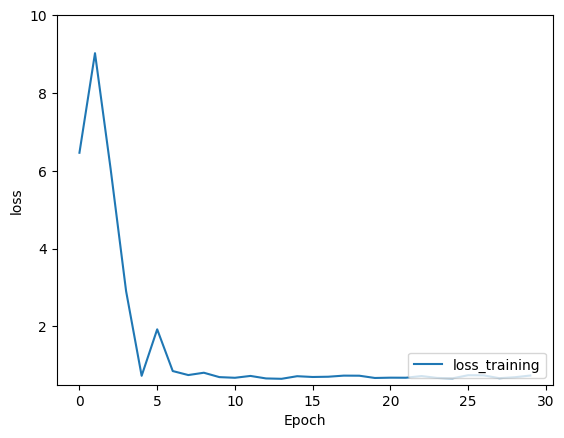

In [83]:
plt.plot(range(30),history.history['loss'], label='loss_training')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 10])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)